In [1]:
import numpy as np
from neuron import neuron
import random
from receptive_field import rf
import imageio
from spike_train import *
from weight_initialization import learned_weights
import matplotlib.pyplot as plt

In [2]:
global time, T, dt, t_back, t_fore, w_min
T = 200
time  = np.arange(1, T+1, 1)
t_back = -20
t_fore = 20
Pth = 150 #Should be Pth = 6 for deterministic spike train
m = 784 #Number of neurons in first layer 28*28
n = 8 #Number of neurons in second layer
epochs = 1
num_of_images = 6
w_max = 0.5
w_min = -0.5

In [3]:
layer2=[neuron() for _ in range(n)]

In [4]:
synapse = np.zeros((n,m))
weight_matrix = learned_weights()
#Synaptic strengths for neuron 0,1,2,3,4,5
for i in range(num_of_images):
    synapse[i] = weight_matrix[i]
#Synaptic strengths for neuron 6,7 are random
synapse[num_of_images:] = np.random.uniform(w_min,w_max,size = (n - num_of_images , m))

In [5]:
spike_counts = []
for k in range(epochs):
    for i in range(6):
        spike_count = np.zeros((n,1))

        #read the image to be classified
        img = imageio.imread("data/" + str(i) + ".png")

        #initialize the potentials of output neurons
        for x in layer2:
            x.initial()

    #calculate teh membrane potentials of input neurons
        pot = rf(img)

    #generate spike trains. Select between deterministic and stochastic
        # train = np.array(encode_deterministic(pot))
        train = np.array(encode_stochastic(img))

    #flag for lateral inhibition
        f_spike = 0
        active_pot = np.zeros((n,1))
        for t in time:
            for j, x in enumerate(layer2):
                active = []

        #update potential if not in refractory period
                if(x.t_rest<t):
                    x.P = x.P + np.dot(synapse[j], train[:,t])
                    if(x.P>x.Prest):
                        x.P -= x.D
                    active_pot[j] = x.P

            # Lateral Inhibition
            if(f_spike==0):
                high_pot = max(active_pot)
                if(high_pot>Pth):
                    f_spike = 1
                    winner = np.argmax(active_pot)
                    for s in range(n):
                        if(s!=winner):
                            layer2[s].P = layer2[s].Pmin
                    print(f"Winner: {winner}   @ t={t}")

            #Check for spikes
            for j,x in enumerate(layer2):
                s = x.check()
                if(s==1):
                    spike_count[j] += 1
                    x.t_rest = t + x.t_ref
            f_spike = 0
        #print(spike_count)
        spike_counts.append(spike_count)

Winner: 0   @ t=4
Winner: 0   @ t=5
Winner: 0   @ t=6
Winner: 0   @ t=7
Winner: 0   @ t=8
Winner: 0   @ t=12
Winner: 0   @ t=13
Winner: 0   @ t=14
Winner: 0   @ t=15
Winner: 0   @ t=16
Winner: 0   @ t=20
Winner: 0   @ t=21
Winner: 0   @ t=22
Winner: 0   @ t=23
Winner: 0   @ t=24
Winner: 0   @ t=28
Winner: 0   @ t=29
Winner: 0   @ t=30
Winner: 0   @ t=31
Winner: 0   @ t=32
Winner: 0   @ t=43
Winner: 0   @ t=44
Winner: 0   @ t=45
Winner: 0   @ t=46
Winner: 0   @ t=47
Winner: 0   @ t=51
Winner: 0   @ t=52
Winner: 0   @ t=53
Winner: 0   @ t=54
Winner: 0   @ t=55
Winner: 0   @ t=59
Winner: 0   @ t=60
Winner: 0   @ t=61
Winner: 0   @ t=62
Winner: 0   @ t=63
Winner: 0   @ t=67
Winner: 0   @ t=68
Winner: 0   @ t=69
Winner: 0   @ t=70
Winner: 0   @ t=71
Winner: 0   @ t=75
Winner: 0   @ t=76
Winner: 0   @ t=77
Winner: 0   @ t=78
Winner: 0   @ t=79
Winner: 0   @ t=83
Winner: 0   @ t=84
Winner: 0   @ t=85
Winner: 0   @ t=86
Winner: 0   @ t=87
Winner: 0   @ t=98
Winner: 0   @ t=99
Winner: 0   @ t=1

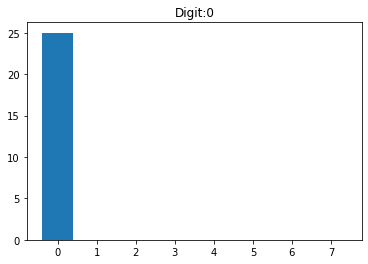

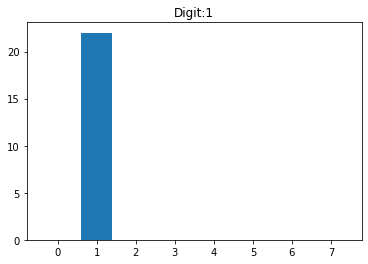

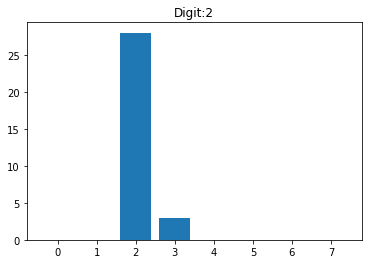

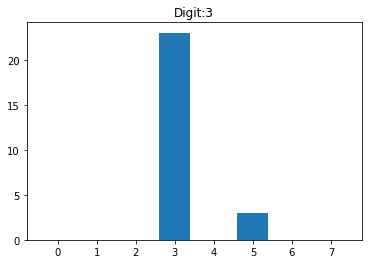

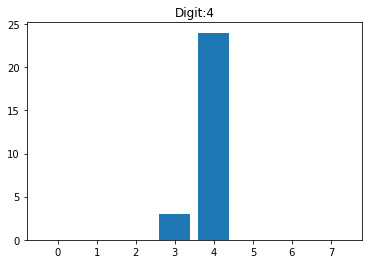

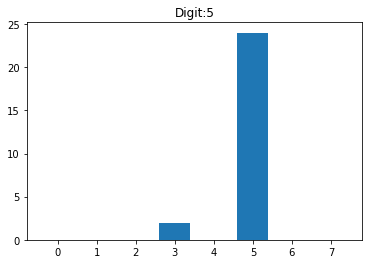

In [6]:
for i in range(6):
    plt.bar([i for i in range(8)],spike_counts[i].reshape(-1))
    plt.title(f"Digit:{i}")
    plt.show()